# Optimization Algorithms for Support Vector Machines 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# This line is only needed if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

# Linearly Separable Data

## SMO Implementations

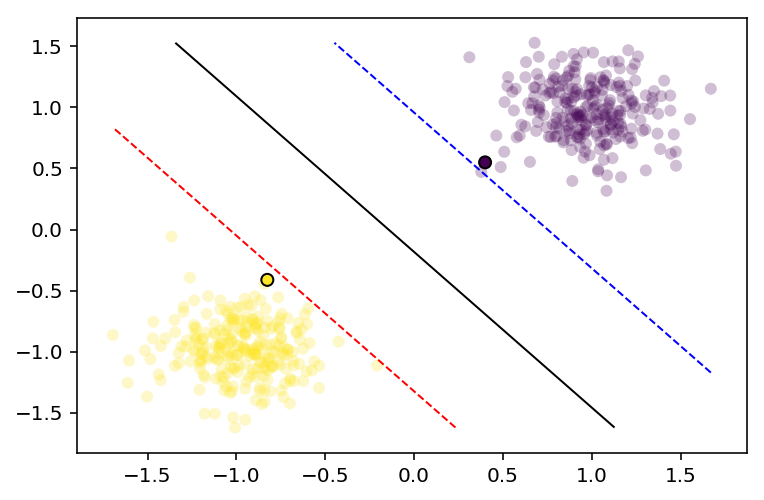

In [2]:
from utils import *
from SMO import *
# Make data
X, y = make_blobs(n_samples=500, centers=2,
                        n_features=2, random_state=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)
y[y == 0] = -1

# Set model parameters and initial values
C = 1000.0
m = len(X_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = SMOModel(X_scaled, y, C, linear_kernel,
                 initial_alphas, initial_b, np.zeros(m), tol, eps)

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

# Train and Visualize
np.random.seed(2019)
output = train(model)

fig, ax = plt.subplots()
grid, ax = plot_decision_boundary_0(output, ax)

# Linearly Separable Data

## SGD Implementations

Accuracy on training data =  1.0


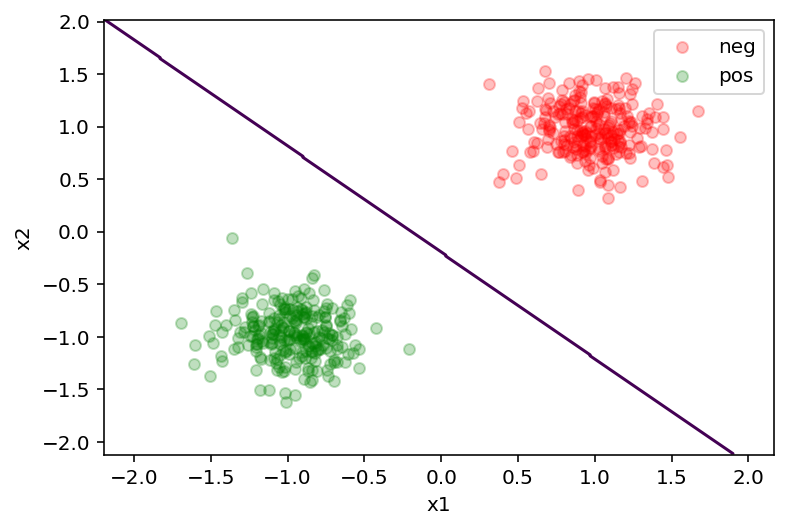

In [3]:
import linear_svm
import utils
from sklearn import preprocessing, metrics
from linear_classifier import LinearSVM_twoclass

# Make data
X, y = make_blobs(n_samples=500, centers=2,
                        n_features=2, random_state=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)

y[y == 0] = -1

XX = np.array([(1,x1,x2) for (x1,x2) in X_scaled])

C = 1000

svm = LinearSVM_twoclass()
svm.theta = np.zeros((XX.shape[1],))
svm.train(XX,y,learning_rate=1e-4,reg=C,num_iters=50000,verbose=False,batch_size=XX.shape[0])

# classify the training data

y_pred = svm.predict(XX)

print( "Accuracy on training data = ", metrics.accuracy_score(y,y_pred))

# visualize the decision boundary

utils.plot_decision_boundary(X_scaled,y,svm,'x1','x2',['neg','pos'])

# Non-Linearly Separable Data

## SMO Implementations

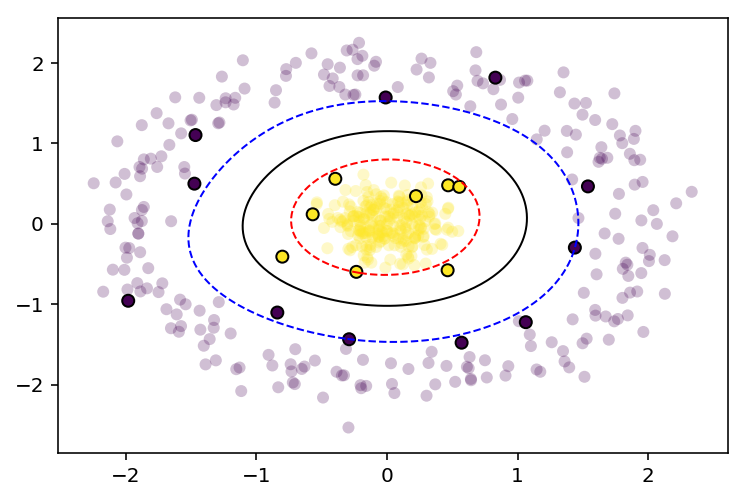

In [4]:
X, y = make_circles(n_samples=500, noise=0.1,
                          factor=0.1,
                          random_state=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)
y[y == 0] = -1

# Set model parameters and initial values
C = 1.0
m = len(X_scaled)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Set tolerances
tol = 0.01 # error tolerance
eps = 0.01 # alpha tolerance

# Instantiate model
model = SMOModel(X_scaled, y, C, gaussian_kernel,
                 initial_alphas, initial_b, np.zeros(m),tol,eps)

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,
                                  model.X, model.X, model.b) - model.y
model.errors = initial_error

output = train(model)
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary_0(output, ax)

# Non-Linearly Separable Data

## SGD Implementations

Accuracy on training data =  1.0


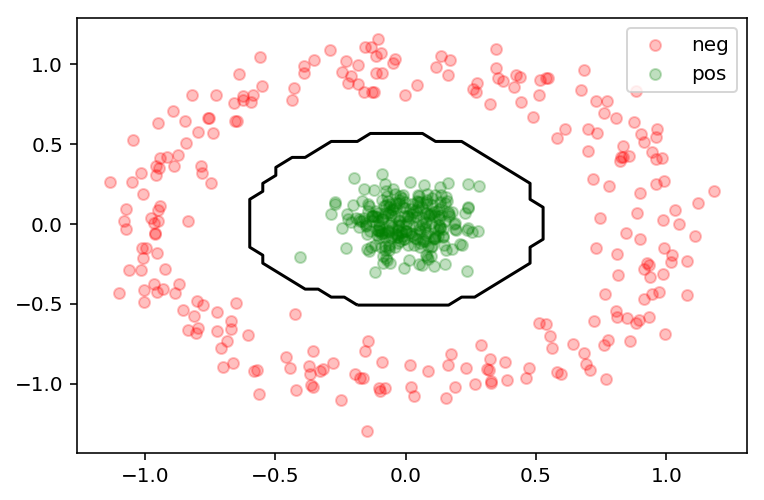

In [6]:
# Make data
X, y = make_circles(n_samples=500, noise=0.1,
                          factor=0.1,
                          random_state=1)
y[y == 0] = -1

C = 1
sigma = 1/2

# compute the kernel (slow!)

K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])

# scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

svm = LinearSVM_twoclass()
svm.theta = np.zeros((KK.shape[1],))
svm.train(KK,y,learning_rate=1e-4,reg=C,num_iters=20000,verbose=False,batch_size=KK.shape[0])

# classify the training data

y_pred = svm.predict(KK)

print( "Accuracy on training data = ", metrics.accuracy_score(y,y_pred))

# visualize the decision boundary

utils.plot_decision_kernel_boundary(X,y,scaler,sigma,svm,'','',['neg','pos'])
